# Perceptron

## What is Artificial Neuron

An artificial neuron is a mathematical function based on a model of biological neurons, where each neuron takes inputs, weighs them separately, sums them up and passes this sum through a nonlinear function to produce output.



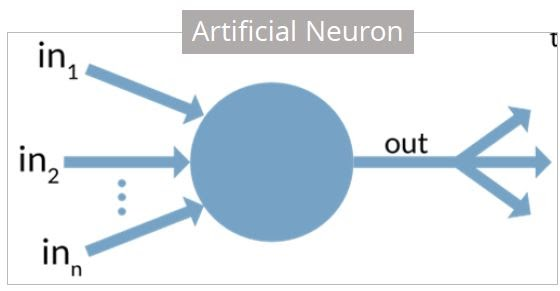

In [31]:
from IPython.display import Image
Image('diagram-for-general-view-of-artificial-neuron_2.jpeg')

## Perceptron 
Perceptron was introduced by Frank Rosenblatt in 1957. He proposed a Perceptron learning rule based on the original MCP neuron. A Perceptron is an algorithm for supervised learning of binary classifiers. This algorithm enables neurons to learn and processes elements in the training set one at a time.
## Definition
In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input 

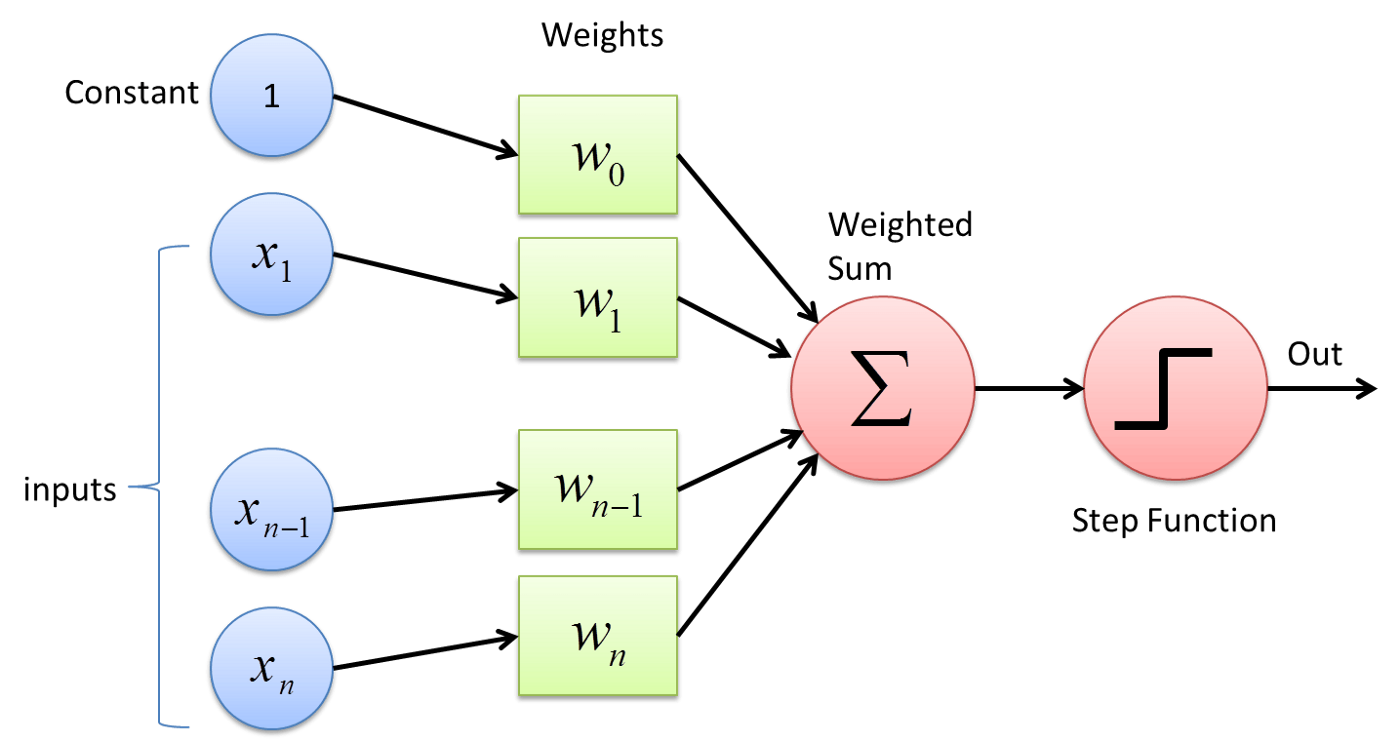

In [32]:
from IPython.display import Image
Image('Perceptron.png')

# How does it work?
## The perceptron works on these simple steps
### a. All the inputs x are multiplied with their weights w. Let’s call it k.



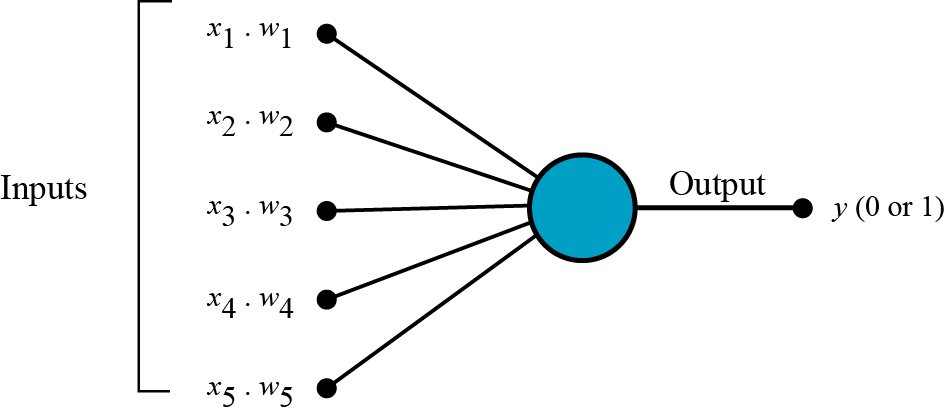

In [33]:
from IPython.display import Image
Image('working.png')

### b. Add all the multiplied values and call them Weighted Sum.

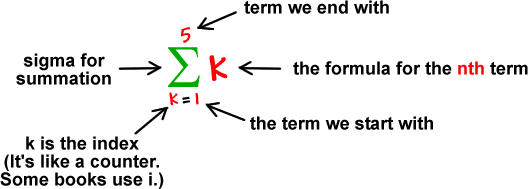

In [34]:
from IPython.display import Image
Image('b.gif')

### c. Apply that weighted sum to the correct Activation Function.
### For Example: Unit Step Activation Function.


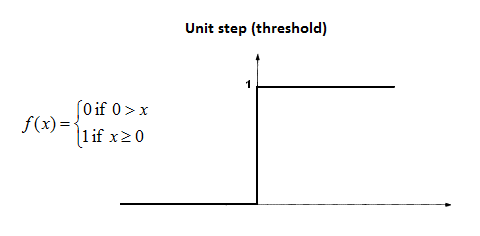

In [35]:
from IPython.display import Image
Image('c.png')

## Why do we need Weights and Bias?
## Weights shows the strength of the particular node.
## A bias value allows you to shift the activation function curve up or down.


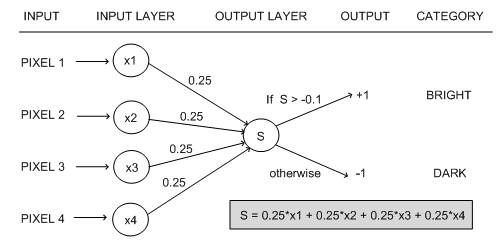

In [36]:
from IPython.display import Image
Image('d.gif')

## Why do we need Activation Function?
### In short, the activation functions are used to map the input between the required values like (0, 1) or (-1, 1).
## Where we use Perceptron?
### Perceptron is usually used to classify the data into two parts. Therefore, it is also known as a Linear Binary Classifier. 

## Import the required packages

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

## The algorithm

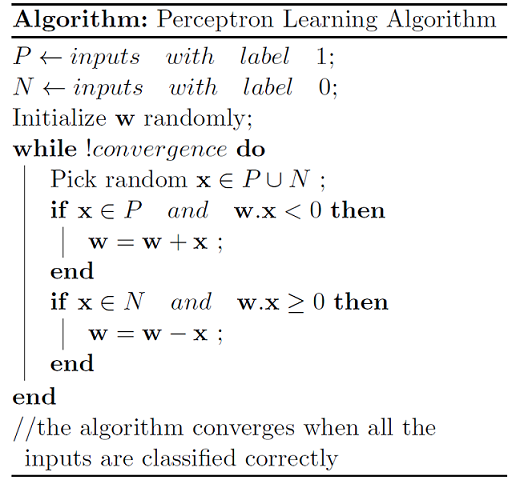

In [38]:
%matplotlib inline
from IPython.display import Image
Image('Perceptron Algo.png')

In [39]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

## Loading the dataset make_blobs from sklearn datasets

Perceptron classification 1.0


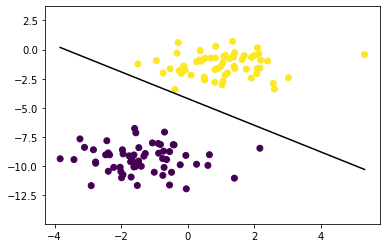

In [40]:
# Testing
if __name__ == "__main__":

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

# Output